<a href="https://colab.research.google.com/github/ThanuMahee12/ayush-vision/blob/res-net/Algorithums/pretrained/ResNet50/ResidualNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ResNet 50

## Imports

### Collab Imports

In [1]:
from google.colab import drive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Tensorflow Imports

In [91]:
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D,Flatten

## Variables

### Path variables

In [4]:
dataset_dir='/content/drive/MyDrive/ayushvision_root' #datasetbase dirctory

In [17]:
dataset_train_dir=os.path.join(dataset_dir,'train')
dataset_val_dir=os.path.join(dataset_dir,'val')
dataset_test_dir=os.path.join(dataset_dir,'test')

### Genrator Variable

In [6]:
rescale=1/255

### Configration Variables

In [49]:
target_size=(224,224)
class_mode='sparse'
input_shape=(224,224,3)

### Model Variables

#### Number If Classes

In [8]:
no_of_classes=32

## Envirumentatl Setup

### Collab

In [9]:
drive.mount('/content/drive') # drive activate for Use

Mounted at /content/drive


## Validations

In [18]:
f'{dataset_train_dir} is Correct' if os.path.exists(dataset_train_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_train_dir} is incorrect'


'/content/drive/MyDrive/ayushvision_root/train is Correct'

In [19]:
f'{dataset_test_dir} is Correct' if os.path.exists(dataset_test_dir) and os.path.isdir(dataset_train_dir) else f' {dataset_test_dir} is incorrect'


'/content/drive/MyDrive/ayushvision_root/test is Correct'

In [20]:
f'{dataset_val_dir} is Correct' if os.path.exists(dataset_val_dir) and os.path.isdir(dataset_val_dir) else f' {dataset_val_dir} is incorrect'

'/content/drive/MyDrive/ayushvision_root/val is Correct'

## DataSet

### Image Genarator

In [21]:
train_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [22]:
test_data_genrator=image.ImageDataGenerator(rescale=rescale)

In [23]:
val_data_genrator=image.ImageDataGenerator(rescale=rescale)

### Prepared Dataset

In [24]:
train_ds_gen=train_data_genrator.flow_from_directory(
    dataset_train_dir,
    target_size=target_size,
    class_mode=class_mode
)


Found 420 images belonging to 1 classes.


In [25]:
val_ds_gen=val_data_genrator.flow_from_directory(
    dataset_val_dir,
    target_size=target_size,
    class_mode=class_mode
)



Found 46 images belonging to 1 classes.


In [50]:
test_ds_gen=test_data_genrator.flow_from_directory(
    dataset_test_dir,
    target_size=target_size,
    class_mode=class_mode
)

Found 14 images belonging to 2 classes.


## Model


### Base Model ResNet50

In [119]:
ayush_resnet50_base=ResNet50(include_top=False,input_shape=input_shape)

### Layers setup for Base Model

In [120]:
for layer in ayush_resnet50_base.layers:
    layer.trainable=False

### Final Model

In [121]:
ayushVision_Resnet50_Model=Sequential([Input(shape=input_shape)])


In [122]:
ayushVision_Resnet50_Model.add(ayush_resnet50_base)


In [123]:
ayushVision_Resnet50_Model.add(GlobalAveragePooling2D())

#### Middle Layers

In [124]:
ayushVision_Resnet50_Model.add(Dense(1024,activation='relu'))

In [125]:
ayushVision_Resnet50_Model.add(Flatten() )

In [126]:
ayushVision_Resnet50_Model.add(Dense(512,activation='relu'))

In [127]:
ayushVision_Resnet50_Model.add(Flatten())

#### Last Layer

In [128]:
ayushVision_Resnet50_Model.add(Dense(no_of_classes,activation='softmax'))

In [129]:
epochs=10

In [130]:
ayushVision_Resnet50_Model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_7           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │          16,416 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,227,104 (100.05 MB)

 Trainable params: 2,639,392 (10.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

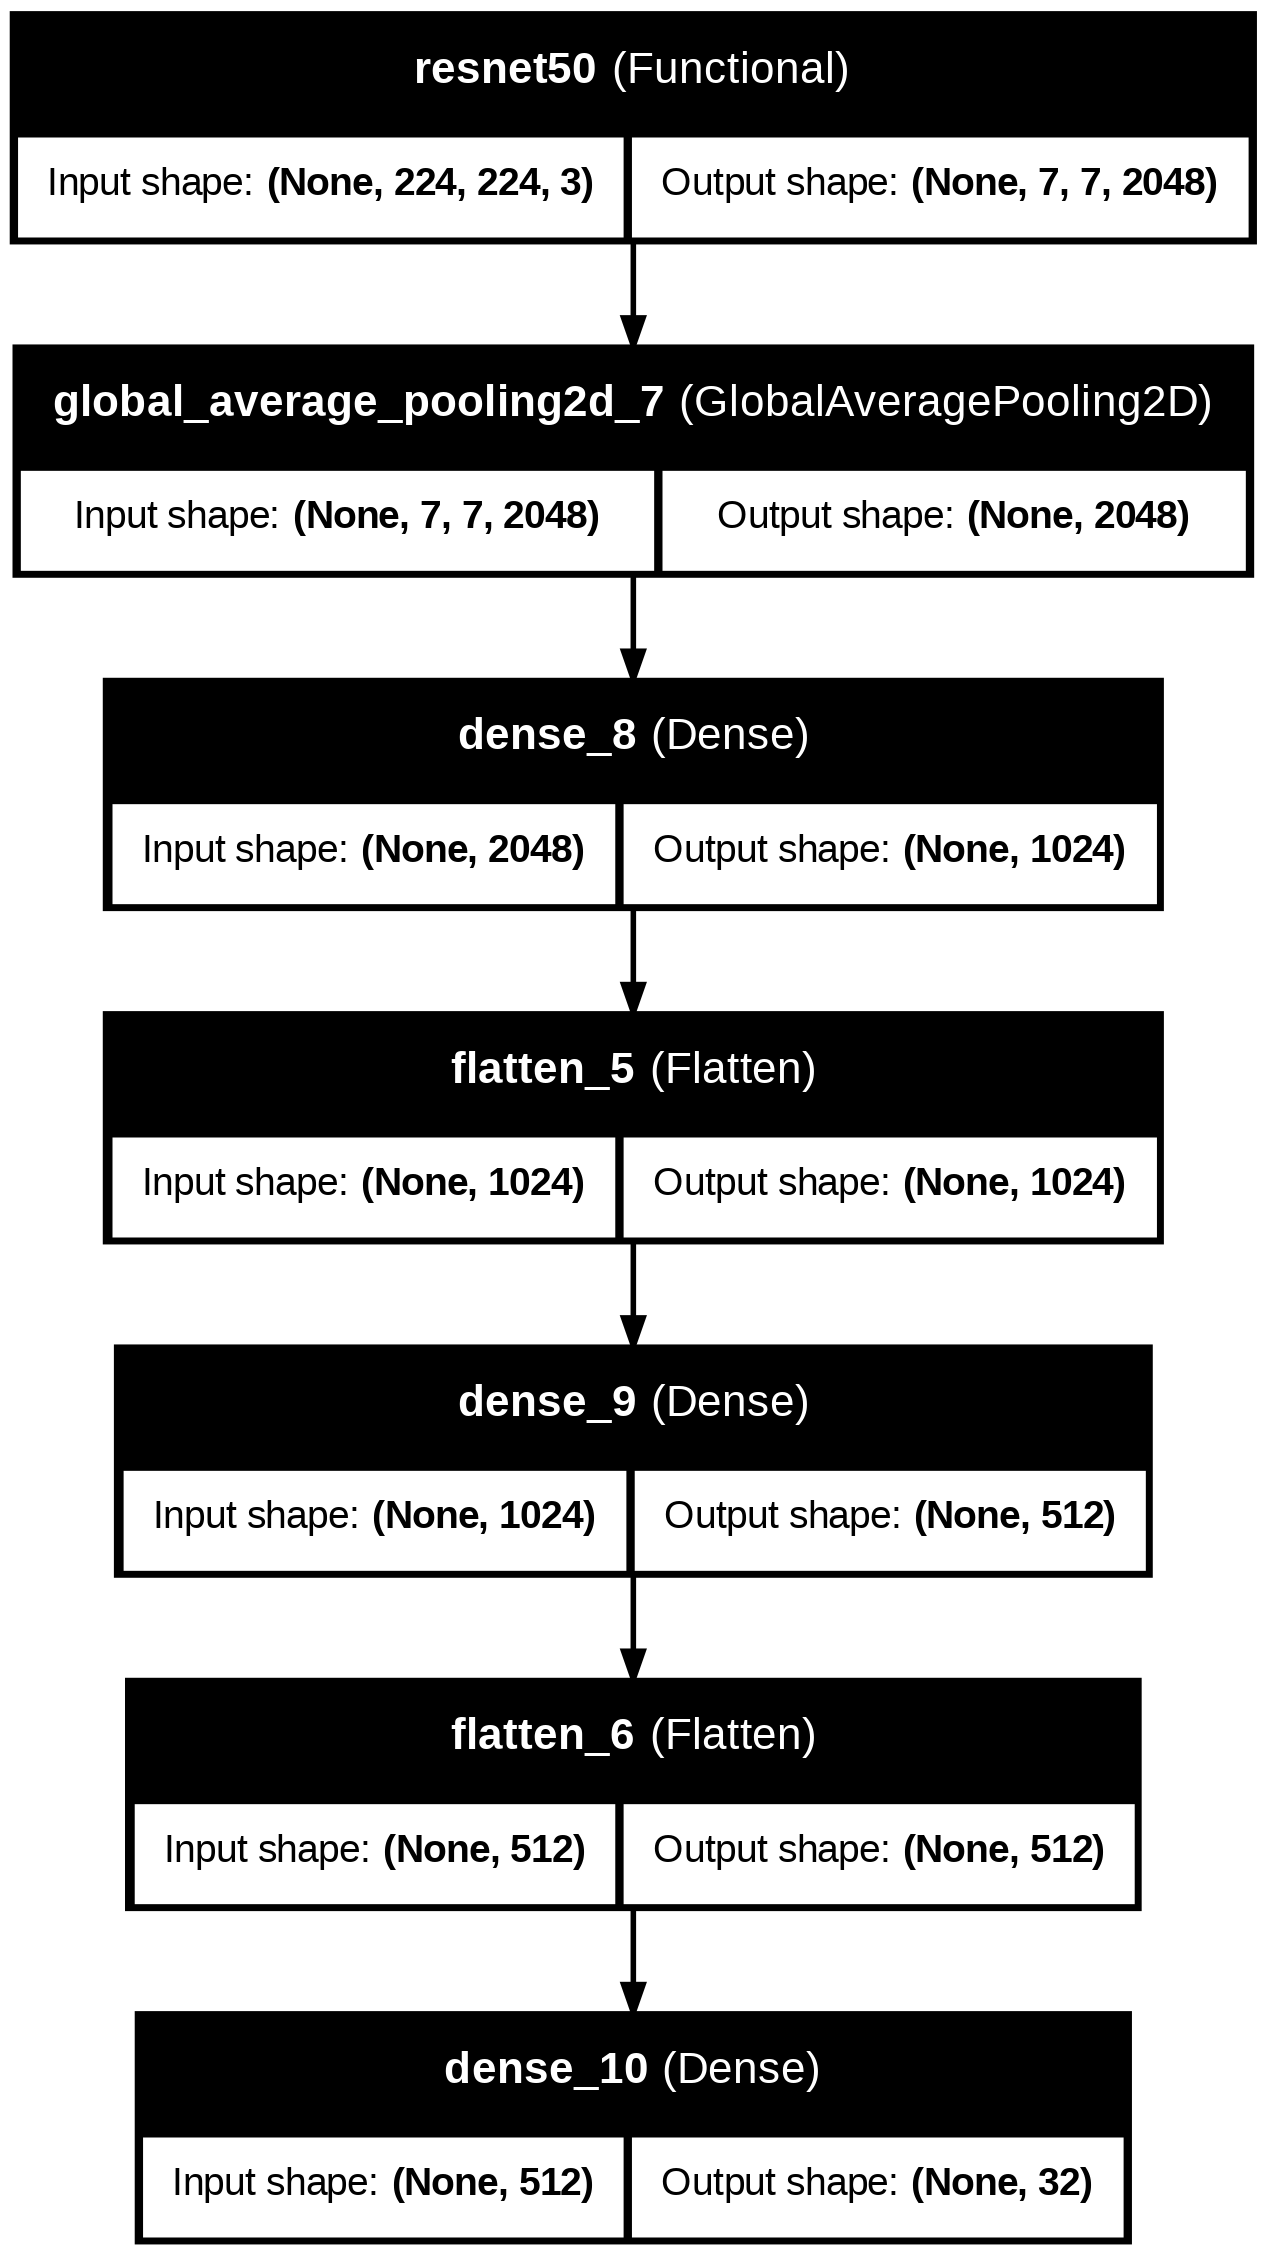

In [131]:
plot_model(ayushVision_Resnet50_Model, to_file= f'/content/drive/My Drive/res50{epochs}.png' , show_shapes=True, show_layer_names=True)

## Model Compile

#### Optimizer

In [132]:
optimizer = Adam(learning_rate=0.001)

#### Compile

##### Variables

In [133]:
metrics=["accuracy"]
lossfn='categorical_crossentropy'

In [134]:
ayushVision_Resnet50_Model.compile(
    optimizer=optimizer,
    loss=lossfn,
    metrics=metrics)

### Trainning

In [135]:
model_history=ayushVision_Resnet50_Model.fit(
    train_ds_gen,
    epochs=epochs,
    validation_data=val_ds_gen)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 32)

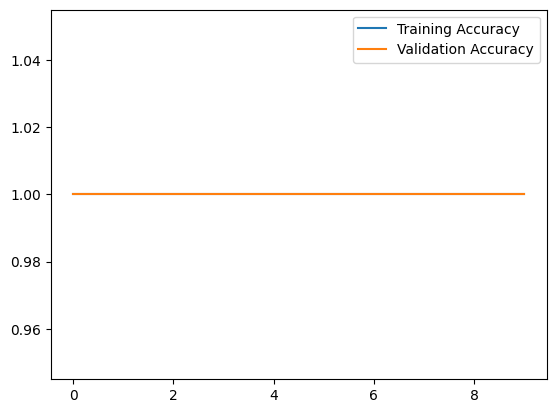

In [46]:
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.savefig(f'accuracy{epochs}.png')
plt.show()

### Evaluation